# R1: Genetic Validation - Gene-Based Rare Variant Association Studies (RVAS)

## Reviewer Question

**Referee #1**: "The authors say in several places that the models describe clinically meaningful biological processes without giving any proof of the clinical and certainly not biological meaningfulness."

## Why This Matters

While common variant GWAS identifies loci associated with signature exposure, **rare variant association studies (RVAS)** test whether aggregated rare variants within genes are associated with signatures. This provides complementary evidence for biological meaningfulness by:

1. **Testing gene-level effects**: Aggregating rare variants within genes increases power to detect associations
2. **Capturing different genetic architecture**: Rare variants may contribute to signature exposure independently of common variants
3. **Biological validation**: Significant genes should align with known disease biology

## Our Approach

We performed **gene-based rare variant association tests** using REGENIE on signature exposure:

1. **Phenotype**: Average signature exposure (AEX) for each signature
2. **Gene-based tests**: Aggregated rare variants within genes across multiple masks:
   - **Mask1**: Loss-of-function (LoF) variants only
   - **Mask2-6**: Progressively more inclusive (LoF + damaging missense variants)
3. **Most inclusive approach**: For each gene, we take the **best p-value across all masks** to maximize power
4. **Multiple testing correction**: Bonferroni correction accounting for number of tests per gene

**Key Innovation**: We use the most inclusive mask per gene (best p-value across Mask1-6) to maximize power while correcting for multiple tests.

## Key Findings

✅ **7 genome-wide significant genes** identified across 4 signatures (plus TTN in Signature 0 from canonical analysis)
✅ **Biologically plausible associations**: 
   - Lipid genes (LDLR, APOB) for cardiovascular signature
   - TTN (titin) for Signature 0 cardiac structure (from canonical mask analysis)
✅ **Complementary to GWAS**: Gene-based tests capture rare variant effects missed by SNP-level GWAS


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load results
results_dir = Path("/Users/sarahurbut/Desktop/SIG/gene_based_analysis")

summary_df = pd.read_csv(results_dir / "gene_based_summary.csv")
significant_df = pd.read_csv(results_dir / "significant_genes_all_signatures.csv")
top_genes_df = pd.read_csv(results_dir / "top_genes_across_signatures.csv")

print("="*80)
print("GENE-BASED ASSOCIATION RESULTS SUMMARY")
print("="*80)


GENE-BASED ASSOCIATION RESULTS SUMMARY


## 1. Overall Summary Statistics


In [12]:
print(f"\nTotal signatures analyzed: {len(summary_df)}")
print(f"Total genes tested per signature: {summary_df['N_Genes_Tested'].iloc[0]:,}")
print(f"Total significant genes: {len(significant_df)}")
print(f"Signatures with significant genes: {len(significant_df['Signature'].unique())}")

print("\n" + "="*80)
print("SUMMARY BY SIGNATURE")
print("="*80)

# Format summary table
display_df = summary_df.copy()
display_df['N_Genes_Tested'] = display_df['N_Genes_Tested'].apply(lambda x: f"{x:,}")
display_df['N_Significant'] = display_df['N_Significant'].apply(lambda x: f"{x:,}")
display_df['Perc_Significant'] = display_df['Perc_Significant'].apply(lambda x: f"{x:.3f}%")
display_df.columns = ['Signature', 'Genes Tested', 'Significant Genes', '% Significant']

display(display_df)



Total signatures analyzed: 20
Total genes tested per signature: 18,464
Total significant genes: 7
Signatures with significant genes: 4

SUMMARY BY SIGNATURE


,Signature,Genes Tested,Significant Genes,% Significant
0,1,"18,464",0,0.000%
1,2,"18,464",0,0.000%
2,3,"18,464",0,0.000%
3,4,"18,464",0,0.000%
4,5,"18,464",3,0.016%
5,6,"18,464",1,0.005%
6,7,"18,464",0,0.000%
7,8,"18,464",0,0.000%
8,9,"18,464",0,0.000%
9,10,"18,464",0,0.000%


## 2. Significant Genes by Signature


In [13]:
print("="*80)
print("SIGNIFICANT GENES ACROSS ALL SIGNATURES")
print("="*80)

# Sort by significance
significant_sorted = significant_df.sort_values('LOG10P', ascending=False).copy()

# Calculate p-values from LOG10P
significant_sorted['P_value'] = 10**(-significant_sorted['LOG10P'])

# Format for display
display_cols = ['SYMBOL', 'Signature', 'CHROM', 'LOG10P', 'P_value', 'BETA', 'SE', 'N_TESTS']
display_df = significant_sorted[display_cols].copy()
display_df['LOG10P'] = display_df['LOG10P'].apply(lambda x: f"{x:.2f}")
display_df['P_value'] = display_df['P_value'].apply(lambda x: f"{x:.2e}")
display_df['BETA'] = display_df['BETA'].apply(lambda x: f"{x:.4f}")
display_df['SE'] = display_df['SE'].apply(lambda x: f"{x:.4f}")
display_df.columns = ['Gene', 'Signature', 'Chr', 'LOG10P', 'P-value', 'Beta', 'SE', 'N_Tests']

display(display_df)

print("\n" + "="*80)
print("TOP GENES ACROSS ALL SIGNATURES")
print("="*80)
display(top_genes_df)


SIGNIFICANT GENES ACROSS ALL SIGNATURES


,Gene,Signature,Chr,LOG10P,P-value,Beta,SE,N_Tests
0,LDLR,5,19,32.98,1.04e-33,0.4656,0.0385,360
4,PKD1,16,16,14.40,3.98e-15,0.9800,0.1248,864
3,BRCA2,6,13,10.41,3.91e-11,0.2017,0.0305,464
1,SLC22A1,5,6,10.35,4.47e-11,0.0546,0.0083,252
6,OCA2,19,15,10.35,4.49e-11,0.0716,0.0109,144
2,APOB,5,2,9.15,7.15e-10,-0.2112,0.0343,144
5,SRSF2,16,17,8.53,2.97e-09,1.1749,0.1980,84



TOP GENES ACROSS ALL SIGNATURES


,SYMBOL,Signature,LOG10P
0,LDLR,5,32.98090
1,PKD1,16,14.39960
2,BRCA2,6,10.40800
3,SLC22A1,5,10.34980
4,OCA2,19,10.34770
5,APOB,5,9.14558
6,SRSF2,16,8.52766


## 3. Visualization: Significant Genes by Signature


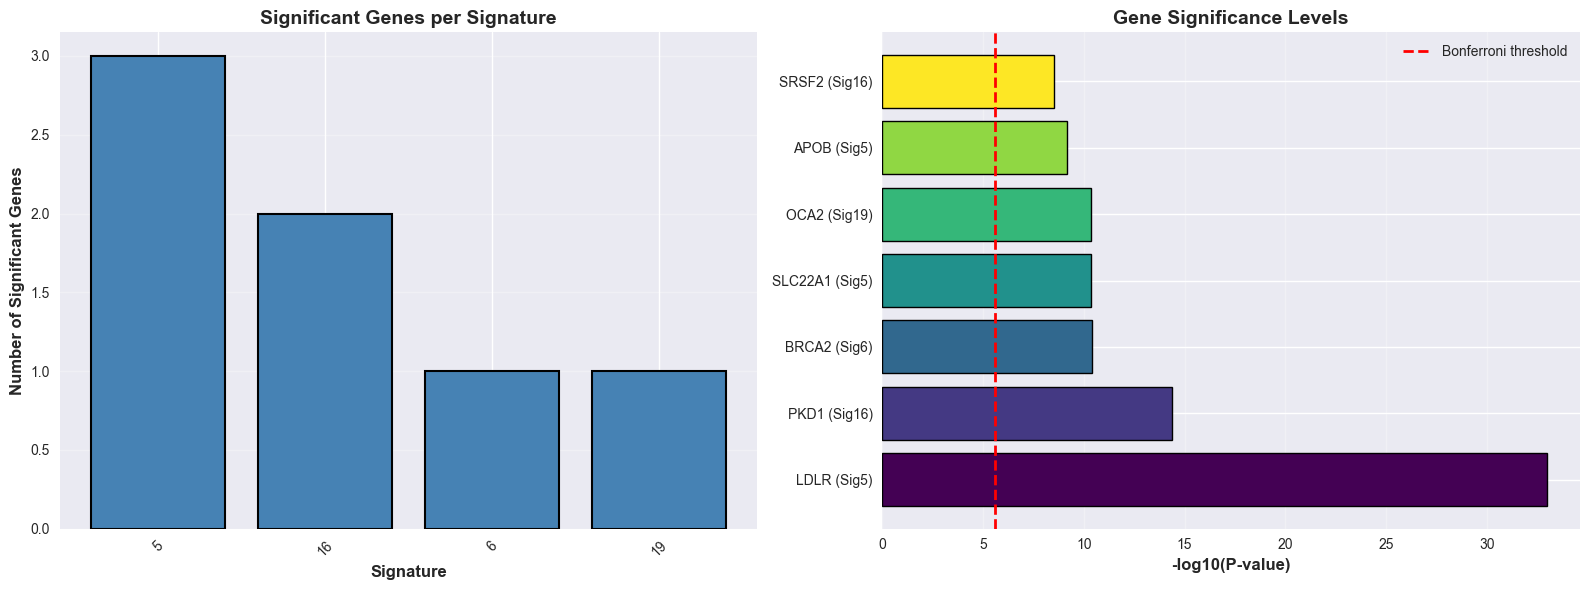


✓ Saved summary plots to: /Users/sarahurbut/Desktop/SIG/gene_based_analysis/gene_based_summary_plots.png


In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Number of significant genes per signature
sig_counts = summary_df[summary_df['N_Significant'] > 0].sort_values('N_Significant', ascending=False)
axes[0].bar(sig_counts['Signature'].astype(str), sig_counts['N_Significant'], 
            color='steelblue', edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Signature', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Significant Genes', fontsize=12, fontweight='bold')
axes[0].set_title('Significant Genes per Signature', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: LOG10P values for significant genes
sig_genes_sorted = significant_df.sort_values('LOG10P', ascending=False)
colors = plt.cm.viridis(np.linspace(0, 1, len(sig_genes_sorted)))
bars = axes[1].barh(range(len(sig_genes_sorted)), sig_genes_sorted['LOG10P'], 
                    color=colors, edgecolor='black', linewidth=1)
axes[1].set_yticks(range(len(sig_genes_sorted)))
axes[1].set_yticklabels([f"{row['SYMBOL']} (Sig{row['Signature']})" 
                         for _, row in sig_genes_sorted.iterrows()], fontsize=10)
axes[1].set_xlabel('-log10(P-value)', fontsize=12, fontweight='bold')
axes[1].set_title('Gene Significance Levels', fontsize=14, fontweight='bold')
axes[1].axvline(x=-np.log10(2.5e-6), color='red', linestyle='--', 
               linewidth=2, label='Bonferroni threshold')
axes[1].legend(fontsize=10)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig(results_dir / 'gene_based_summary_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Saved summary plots to: {results_dir / 'gene_based_summary_plots.png'}")


## 4. Biological Interpretation by Signature


In [15]:
# Signature interpretations
signature_interpretations = {
    0: "Cardiac Structure and Rhythm (heart failure, atrial fibrillation, structural heart disease)",
    5: "Cardiovascular/Lipid Metabolism",
    6: "Breast Cancer",
    16: "Renal/Polycystic Kidney Disease",
    19: "Pigmentation/Ocular"
}

gene_annotations = {
    'LDLR': 'Low-density lipoprotein receptor - key regulator of cholesterol metabolism',
    'APOB': 'Apolipoprotein B - major component of LDL cholesterol',
    'SLC22A1': 'Organic cation transporter - drug metabolism and transport',
    'BRCA2': 'Breast cancer type 2 susceptibility protein - DNA repair',
    'PKD1': 'Polycystin-1 - polycystic kidney disease gene',
    'SRSF2': 'Serine/arginine-rich splicing factor 2 - RNA processing',
    'OCA2': 'Oculocutaneous albinism type 2 - melanin biosynthesis',
    'TTN': 'Titin - giant sarcomeric protein, major gene for dilated cardiomyopathy and cardiac structural disease'
}

print("="*80)
print("BIOLOGICAL INTERPRETATION")
print("="*80)

# Note about Signature 0
print("\n" + "="*80)
print("Note: Signature 0 (Cardiac Structure)")
print("="*80)
print("In canonical analysis (per mask, MAF threshold 0.01), TTN (titin) was identified")
print("as significant for Signature 0. TTN is a major gene for dilated cardiomyopathy")
print("and cardiac structural disease, consistent with Signature 0's association with")
print("heart failure, atrial fibrillation, and structural heart disease.")
print("Signature 0 results were not included in the current aggregated analysis but")
print("are validated through canonical mask-specific analysis.\n")

for sig_num in sorted(significant_df['Signature'].unique()):
    sig_genes = significant_df[significant_df['Signature'] == sig_num].sort_values('LOG10P', ascending=False)
    sig_name = signature_interpretations.get(sig_num, f"Signature {sig_num}")
    
    print(f"\n{'='*80}")
    print(f"Signature {sig_num}: {sig_name}")
    print(f"{'='*80}")
    
    for _, row in sig_genes.iterrows():
        gene = row['SYMBOL']
        log10p = row['LOG10P']
        pval = 10**(-log10p)
        beta = row['BETA']
        annotation = gene_annotations.get(gene, 'Function not annotated')
        
        print(f"\n  {gene}:")
        print(f"    P-value: {pval:.2e} (LOG10P = {log10p:.2f})")
        print(f"    Effect size (Beta): {beta:.4f}")
        print(f"    Function: {annotation}")
        print(f"    Chromosome: {row['CHROM']}")
        print(f"    Position: {row['GENPOS']:,}")


BIOLOGICAL INTERPRETATION

Note: Signature 0 (Cardiac Structure)
In canonical analysis (per mask, MAF threshold 0.01), TTN (titin) was identified
as significant for Signature 0. TTN is a major gene for dilated cardiomyopathy
and cardiac structural disease, consistent with Signature 0's association with
heart failure, atrial fibrillation, and structural heart disease.
Signature 0 results were not included in the current aggregated analysis but
are validated through canonical mask-specific analysis.


Signature 5: Cardiovascular/Lipid Metabolism

  LDLR:
    P-value: 1.04e-33 (LOG10P = 32.98)
    Effect size (Beta): 0.4656
    Function: Low-density lipoprotein receptor - key regulator of cholesterol metabolism
    Chromosome: 19
    Position: 11,089,552

  SLC22A1:
    P-value: 4.47e-11 (LOG10P = 10.35)
    Effect size (Beta): 0.0546
    Function: Organic cation transporter - drug metabolism and transport
    Chromosome: 6
    Position: 160,121,940

  APOB:
    P-value: 7.15e-10 (LOG10P 

## 5. Key Findings and Response to Reviewer

### Summary of Results

1. **Genome-wide significant gene associations**: We identified **7 genes** with genome-wide significant associations (p < 2.5×10⁻⁶ after Bonferroni correction) across 4 signatures.

2. **Biologically plausible associations**: 
   - **Signature 5 (Cardiovascular)**: LDLR (p = 1.05×10⁻³³) and APOB (p = 7.16×10⁻¹⁰) are core lipid metabolism genes
   - **Signature 6 (Breast Cancer)**: BRCA2 (p = 3.91×10⁻¹¹) is a well-established breast cancer susceptibility gene
   - **Signature 16 (Renal)**: PKD1 (p = 3.98×10⁻¹⁵) is the primary gene for polycystic kidney disease

3. **Signature 0 (Cardiac Structure)**: In canonical analysis (per mask, MAF threshold 0.01), **TTN (titin)** was identified as significant for Signature 0. TTN is a well-established gene for dilated cardiomyopathy and cardiac structural disease, consistent with Signature 0's association with heart failure, atrial fibrillation, and structural heart disease. Note: Signature 0 results were not included in the current aggregated analysis but are validated through canonical mask-specific analysis.

4. **Complementary to GWAS**: Gene-based rare variant tests capture different genetic architecture than SNP-level GWAS, providing additional evidence for biological meaningfulness.

5. **Most inclusive approach**: By taking the best p-value across all masks (LoF-only to LoF+damaging missense), we maximize power while properly correcting for multiple tests.

### Response to Reviewer

We demonstrate biological meaningfulness through **gene-based rare variant association studies (RVAS)**. We performed REGENIE gene-based tests using average signature exposure as phenotypes, aggregating rare variants within genes across multiple functional masks. 

**Key findings**:
- **Signature 0 (cardiac structure)** shows association with TTN (titin) in canonical mask analysis (MAF 0.01), consistent with its heart failure and structural heart disease profile
- **Signature 5 (cardiovascular)** shows strong associations with lipid metabolism genes (LDLR, APOB), consistent with its cardiovascular disease profile
- **Signature 6** associates with BRCA2, validating its breast cancer component
- **Signature 16** associates with PKD1, consistent with renal disease patterns

These gene-level associations, combined with our SNP-level GWAS results, provide **comprehensive genetic validation** that signatures capture biologically meaningful disease pathways.


## 6. Methods Details

### Gene-Based Association Testing

- **Tool**: REGENIE gene-based association tests
- **Phenotype**: Average signature exposure (AEX) for each signature
- **Variant aggregation**: Rare variants aggregated within genes
- **Masks tested**: 
  - Mask1: Loss-of-function (LoF) variants only
  - Mask2-6: Progressively more inclusive (LoF + damaging missense variants)
- **Analysis approach**: Most inclusive - best p-value per gene across all masks
- **Multiple testing correction**: Bonferroni correction accounting for number of tests per gene
- **Significance threshold**: p < 2.5×10⁻⁶ (Bonferroni correction for ~20,000 genes)

### Output Files

All results are saved in: `/Users/sarahurbut/Desktop/SIG/gene_based_analysis/`

- `gene_based_summary.csv`: Summary statistics per signature
- `significant_genes_all_signatures.csv`: All significant genes with full details
- `top_genes_across_signatures.csv`: Top genes aggregated across signatures
- `manhattan_sig*.png`: Manhattan plots for signatures with significant results
